In [284]:
import pandas as pd
import textwrap
from matplotlib import pyplot as plt

Read data and remove spaces

In [285]:
df = pd.read_csv("data.csv", delimiter=";", skipinitialspace=True, decimal=",", thousands=".")
df.columns= [x.strip() for x in df.columns]
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

Change pandas settings to print all rows in the data frame.

In [286]:
pd.set_option('display.max_rows', df.shape[0]+1)

Original dataframe

In [287]:
display(df.sort_values(by='Paese').reset_index())

,index,Paese,Area,Maschi,Femmine,Totale,%
0,53,Afghanistan,Asia centro meridionale,13432,3440,16872,"0,33%"
1,1,Albania,Europa centro orientale,213047,203782,416829,"8,11%"
2,102,Algeria,Africa settentrionale,11679,6416,18095,"0,35%"
3,45,Andorra,Altri paesi europei,5,5,10,"0,00%"
4,123,Angola,Africa centro meridionale,580,554,1134,"0,02%"
5,175,Antigua e Barbuda,America centro meridionale,9,7,16,"0,00%"
6,193,Apolidi,Apolidi,345,298,643,"0,01%"
7,79,Arabia Saudita,Asia occidentale,103,48,151,"0,00%"
8,155,Argentina,America centro meridionale,6777,7885,14662,"0,29%"
9,67,Armenia,Asia occidentale,654,858,1512,"0,03%"


In [288]:
df['Totale '] = pd.to_numeric(df['Totale'])

In [289]:
df_sorted_by_total = df.sort_values(by=['Totale'], ascending=False)
display(df_sorted_by_total)

,Paese,Area,Maschi,Femmine,Totale,%,Totale
0,Romania,Unione Europea,465632,616204,1081836,"21,04%",1081836
1,Albania,Europa centro orientale,213047,203782,416829,"8,11%",416829
93,Marocco,Africa settentrionale,224516,190572,415088,"8,07%",415088
46,Repubblica Popolare Cinese,Asia orientale,154993,152045,307038,"5,97%",307038
2,Ucraina,Europa centro orientale,57263,192350,249613,"4,86%",249613
47,Bangladesh,Asia centro meridionale,124275,49783,174058,"3,39%",174058
48,India,Asia centro meridionale,96741,70592,167333,"3,25%",167333
49,Filippine,Asia orientale,68580,90346,158926,"3,09%",158926
94,Egitto,Africa settentrionale,97932,49865,147797,"2,87%",147797
50,Pakistan,Asia centro meridionale,104754,39375,144129,"2,80%",144129


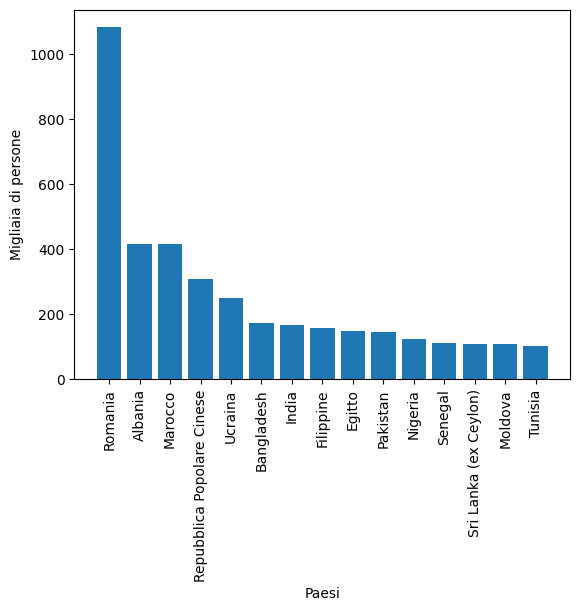

In [322]:
plt.bar(df_sorted_by_total.head(15)['Paese'], df_sorted_by_total.head(15)['Totale']/1000)
plt.xlabel("Paesi")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

Paesi per area geografica

In [326]:
df_areas = df[['Area', 'Paese']].groupby('Area')['Paese'].apply(lambda x: ' '.join(x)).reset_index()

for r in df_areas.index:
   print(df_areas.loc[r]['Area'], '\n', textwrap.wrap(df_areas.loc[r]['Paese'], 40), '\n')

Africa centro meridionale 
 ['Camerun Repubblica democratica del Congo', '(ex Zaire) Repubblica del Congo Angola', 'Sud Africa Gabon Ciad Repubblica', 'Centrafricana Guinea Equatoriale Namibia', 'São Tomé e Principe Eswatini Botswana', 'Lesotho'] 

Africa occidentale 
 ["Nigeria Senegal Ghana Costa d'Avorio", 'Gambia Mali Burkina Faso (ex Alto Volta)', 'Guinea Togo Capo Verde Benin (ex', 'Dahomey) Guinea Bissau Sierra Leone', 'Niger Liberia Mauritania'] 

Africa orientale 
 ['Somalia Etiopia Eritrea Mauritius Kenya', 'Madagascar Tanzania Burundi Uganda', 'Ruanda Mozambico Seychelles Zambia', 'Zimbabwe (ex Rhodesia) Malawi Gibuti', 'Comore'] 

Africa settentrionale 
 ['Marocco Egitto Tunisia Algeria Libia', 'Sudan Sud Sudan'] 

Altri paesi europei 
 ['Svizzera San Marino Norvegia Islanda', 'Principato di Monaco Liechtenstein Città', 'del Vaticano Andorra'] 

America centro meridionale 
 ['Perù Ecuador Brasile Repubblica', 'Dominicana Cuba El Salvador Colombia', 'Argentina Venezuela Boli

Totale di migranti per area geografica

In [327]:
percentual_lambda = {'%' : lambda x: 100*x['Totale']/x['Totale'].sum()} 
df_groupedby_area = df[['Area', 'Maschi', 'Femmine', 'Totale']].groupby('Area').sum().sort_values(by=['Totale'], ascending=False).assign(**percentual_lambda)
display(df_groupedby_area)

,Maschi,Femmine,Totale,%
Area,,,,
Unione Europea,586728,834812,1421540,27.649207
Europa centro orientale,401213,584807,986020,19.178265
Africa settentrionale,402411,286672,689083,13.402787
Asia centro meridionale,399122,220549,619671,12.052712
Asia orientale,229412,260392,489804,9.526775
Africa occidentale,278304,122914,401218,7.803762
America centro meridionale,145621,224794,370415,7.204638
Asia occidentale,29247,42514,71761,1.395764
Africa orientale,18634,17199,35833,0.696958


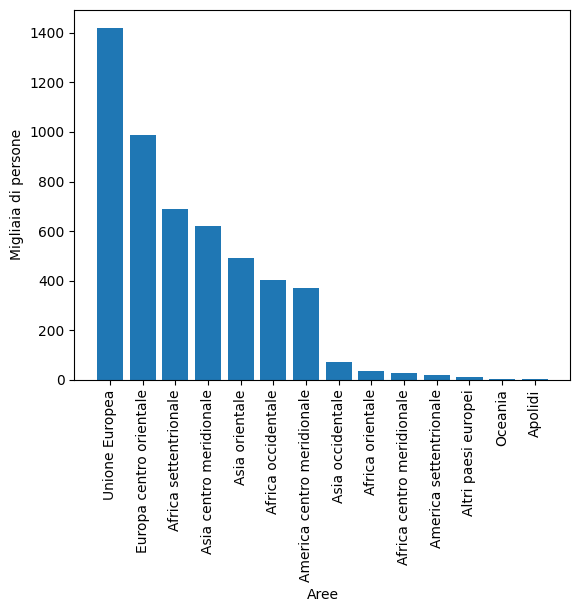

In [391]:
plt.bar(df_groupedby_area.index, df_groupedby_area['Totale']/1000)
plt.xlabel("Aree")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

Percentuale di migranti per area di origine.

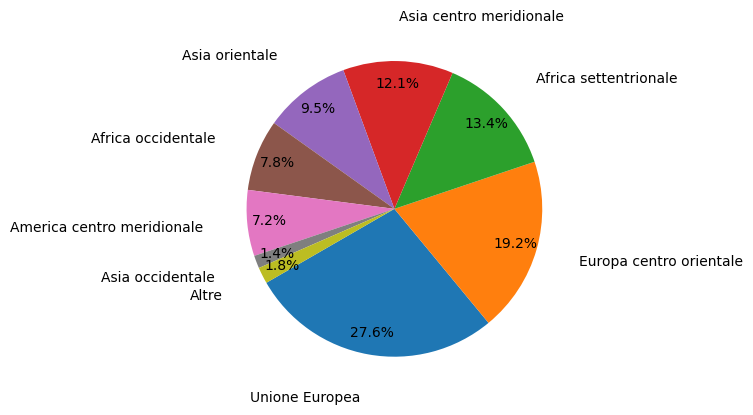

In [385]:
fig, ax = plt.subplots()
small_slices = df_groupedby_area[(df_groupedby_area['%'] <= 1.0)].groupby(df_groupedby_area['%'] <= 1.0).sum()
small_slices.index = ["Altre"]
df_groupedby_area_condensed = pd.concat([df_groupedby_area[(df_groupedby_area['%'] > 1.0)], small_slices])

ax.pie(df_groupedby_area_condensed['%'], labels=df_groupedby_area_condensed.index, autopct='%1.1f%%', labeldistance=1.3, startangle=210, pctdistance=0.85);

In [386]:
df_sorted_by_number_of_men = df[['Paese', 'Area', 'Maschi']].sort_values(by=['Maschi'], ascending=False).reset_index()
display(df_sorted_by_number_of_men)

,index,Paese,Area,Maschi
0,0,Romania,Unione Europea,465632
1,93,Marocco,Africa settentrionale,224516
2,1,Albania,Europa centro orientale,213047
3,46,Repubblica Popolare Cinese,Asia orientale,154993
4,47,Bangladesh,Asia centro meridionale,124275
5,50,Pakistan,Asia centro meridionale,104754
6,94,Egitto,Africa settentrionale,97932
7,48,India,Asia centro meridionale,96741
8,96,Senegal,Africa occidentale,82477
9,95,Nigeria,Africa occidentale,70616


In [395]:
df_sorted_by_number_of_women = df[['Paese', 'Area', 'Femmine']].sort_values(by=['Femmine'], ascending=False).reset_index()
display(df_sorted_by_number_of_women)

,index,Paese,Area,Femmine
0,0,Romania,Unione Europea,616204
1,1,Albania,Europa centro orientale,203782
2,2,Ucraina,Europa centro orientale,192350
3,93,Marocco,Africa settentrionale,190572
4,46,Repubblica Popolare Cinese,Asia orientale,152045
5,49,Filippine,Asia orientale,90346
6,3,Moldova,Europa centro orientale,73026
7,48,India,Asia centro meridionale,70592
8,147,Perù,America centro meridionale,57123
9,4,Polonia,Unione Europea,55631


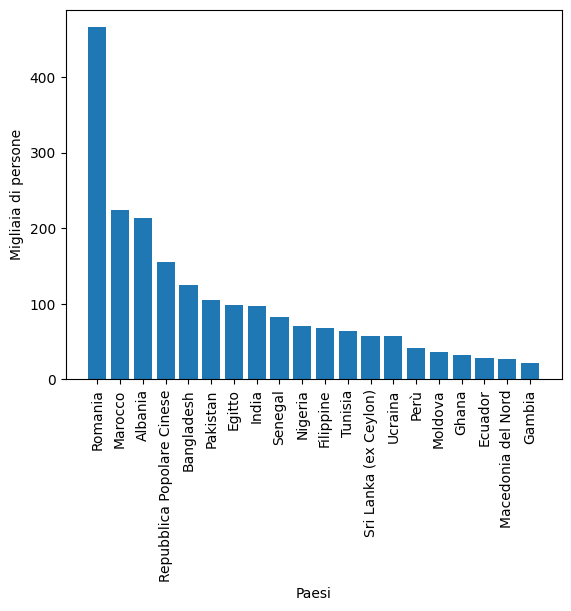

In [390]:
plt.bar(df_sorted_by_number_of_men.head(20)['Paese'], df_sorted_by_number_of_men.head(20)['Maschi']/1000)
plt.xlabel("Paesi")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

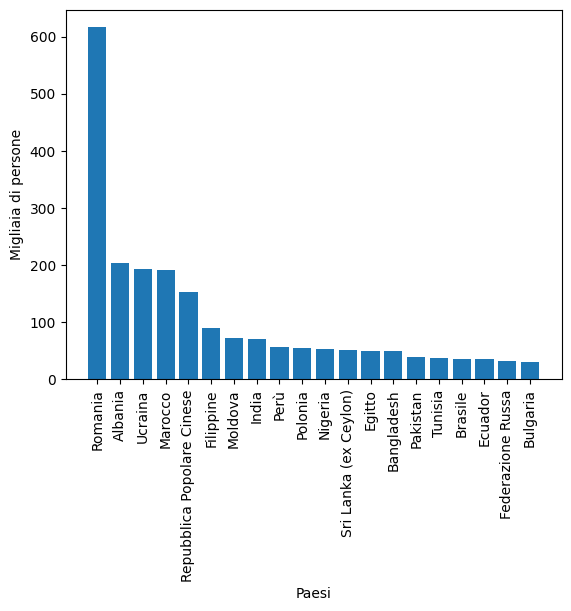

In [396]:
plt.bar(df_sorted_by_number_of_women.head(20)['Paese'], df_sorted_by_number_of_women.head(20)['Femmine']/1000)
plt.xlabel("Paesi")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

In [276]:
assignments = {'Maschi - Femmine': lambda x: x['Maschi'] - x['Femmine'], \
               '% sopra la media': lambda x: 200*(x['Maschi'] - x['Femmine'])/x['Totale'], \
               'Proporzione Maschio/Femmina': lambda x: x['Maschi']/x['Femmine']}
df_diff_maschi_femmine = df.assign(**assignments)
display(df_diff_maschi_femmine[['Paese', 'Maschi', 'Femmine', 'Maschi - Femmine', '% sopra la media', 'Proporzione Maschio/Femmina']]
        .sort_values(by=['Maschi - Femmine'], ascending=False).reset_index())

,index,Paese,Maschi,Femmine,Maschi - Femmine,% sopra la media,Proporzione Maschio/Femmina
0,47,Bangladesh,124275,49783,74492,85.594457,2.496334
1,50,Pakistan,104754,39375,65379,90.722894,2.660419
2,96,Senegal,82477,30121,52356,92.996323,2.738189
3,94,Egitto,97932,49865,48067,65.044622,1.963943
4,93,Marocco,224516,190572,33944,16.355086,1.178116
5,48,India,96741,70592,26149,31.253847,1.370424
6,97,Tunisia,64226,38196,26030,50.828923,1.681485
7,100,Gambia,21627,1010,20617,182.153112,21.412871
8,101,Mali,19898,1134,18764,178.432864,17.546737
9,95,Nigeria,70616,53030,17586,28.445724,1.331624


In [264]:
display(df_diff_maschi_femmine[(df_diff_maschi_femmine['Maschi'] > 0) & (df_diff_maschi_femmine['Femmine'] > 0)] \
        [['Paese', 'Maschi', 'Femmine', 'Maschi - Femmine', '% sopra la media', 'Proporzione Maschio/Femmina']] \
        .sort_values(by=['% sopra la media'], ascending=False).reset_index())

,index,Paese,Maschi,Femmine,Maschi - Femmine,% sopra la media,Proporzione Maschio/Femmina
0,100,Gambia,21627,1010,20617,182.153112,21.412871
1,101,Mali,19898,1134,18764,178.432864,17.546737
2,91,Maldive,14,1,13,173.333333,14.000000
3,118,Guinea Bissau,2112,236,1876,159.795571,8.949153
4,86,Qatar,35,4,31,158.974359,8.750000
5,105,Guinea,10170,1710,8460,142.424242,5.947368
6,131,Ciad,359,85,274,123.423423,4.223529
7,124,Liberia,882,213,669,122.191781,4.140845
8,53,Afghanistan,13432,3440,9992,118.444761,3.904651
9,120,Niger,1299,341,958,116.829268,3.809384
